In [60]:
#Collect Dataset

In [59]:
import pandas as pd

df = pd.read_csv("customer_data.csv")  
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


In [61]:
#Clean Dataset

In [6]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


,id,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,43.783000,88500.800000,50.685000,5.46900,26.596000,492.348670
std,288.819436,15.042213,34230.771122,28.955175,2.85573,14.243654,295.744253
min,1.000000,18.000000,30004.000000,1.000000,1.00000,1.000000,10.400000
25%,250.750000,30.000000,57911.750000,26.000000,3.00000,15.000000,218.762500
50%,500.500000,45.000000,87845.500000,50.000000,5.00000,27.000000,491.595000
75%,750.250000,57.000000,116110.250000,76.000000,8.00000,39.000000,747.170000
max,1000.000000,69.000000,149973.000000,100.000000,10.00000,50.000000,999.740000


In [24]:
df.isnull().sum()


id                      0
age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64

In [25]:
# Numeric columns → fill with mean/median
df.fillna(df.mean(numeric_only=True), inplace=True)

# Categorical columns → fill with mode
df.fillna(df.mode().iloc[0], inplace=True)


In [26]:
df.drop_duplicates(inplace=True)


In [27]:
import pandas as pd

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate IQR on numeric columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

df.head()


,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])  # Example encoding


In [10]:
df = pd.get_dummies(df, drop_first=True)


In [11]:
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)


In [12]:
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


In [13]:
df_clean = df.copy()
df_clean.drop(columns=['id'], inplace=True)


In [14]:
df_clean.drop_duplicates(inplace=True)
print("New shape after dropping duplicates:", df_clean.shape)


New shape after dropping duplicates: (1000, 11)


In [46]:
#Perform EDA 

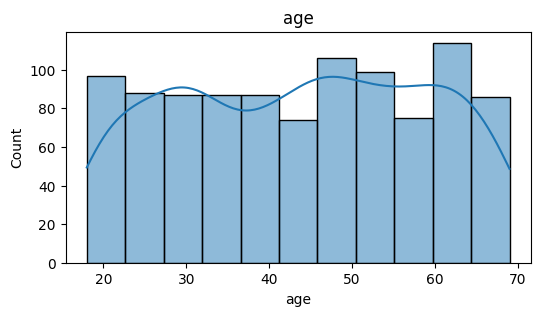

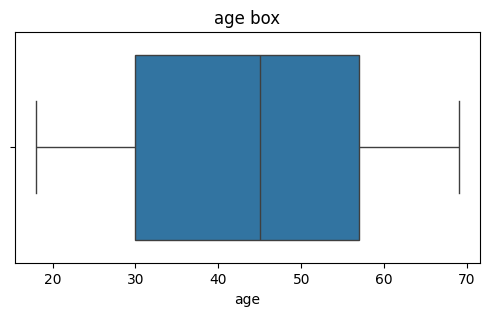

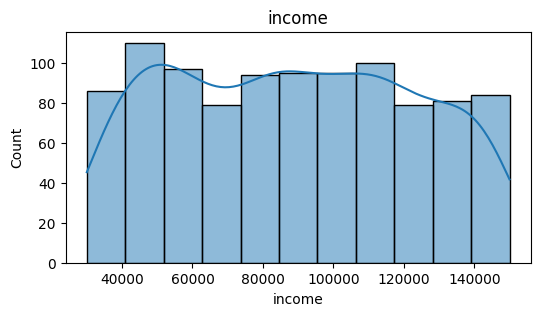

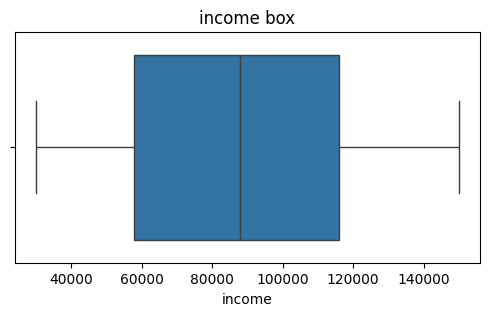

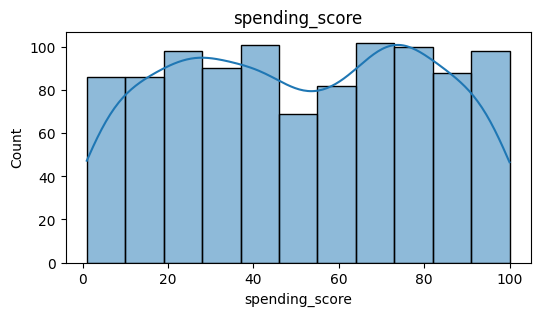

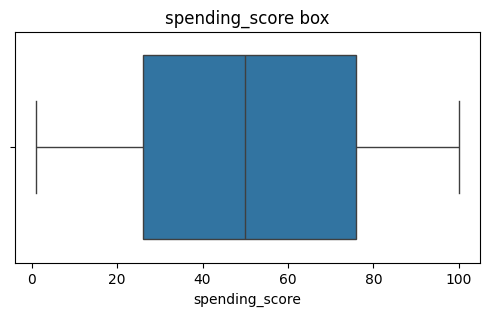

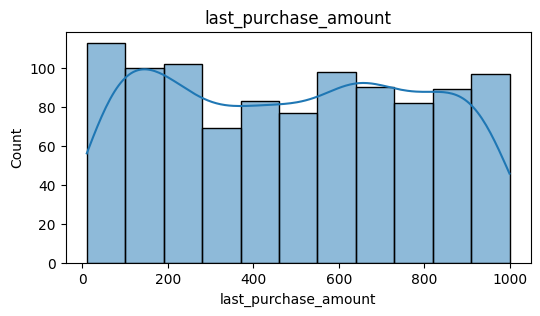

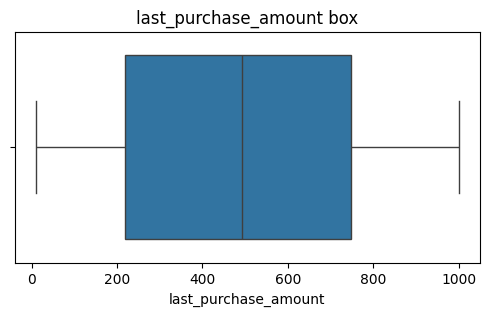

In [17]:
for c in ['age','income','spending_score','last_purchase_amount']:
    plt.figure(figsize=(6,3)); sns.histplot(df[c], kde=True); plt.title(c); plt.show()
    plt.figure(figsize=(6,3)); sns.boxplot(x=df[c]); plt.title(c+' box'); plt.show()


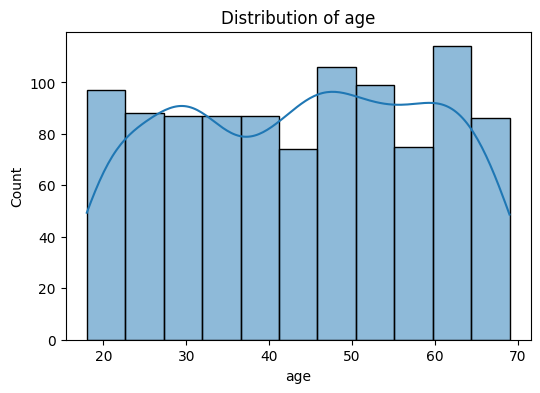

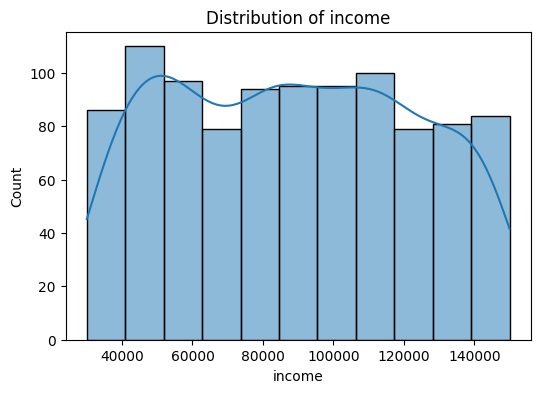

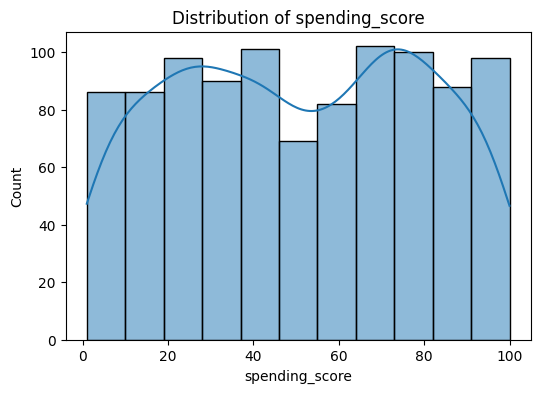

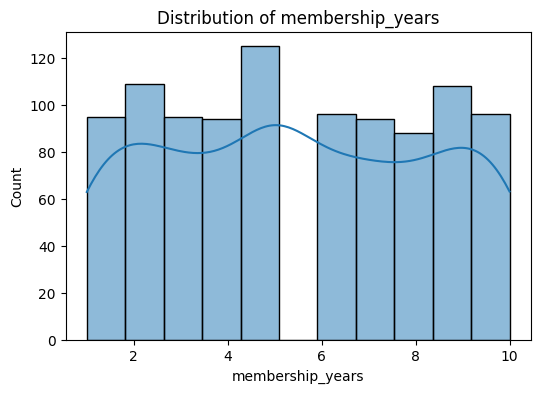

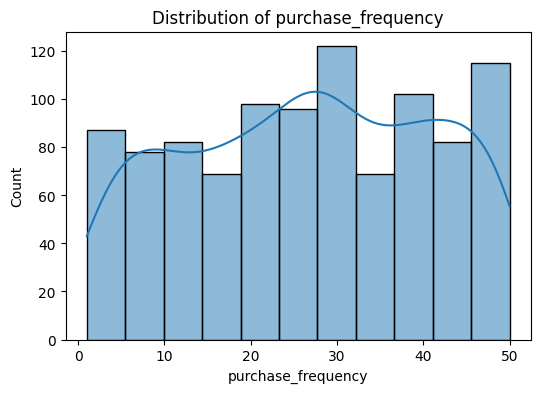

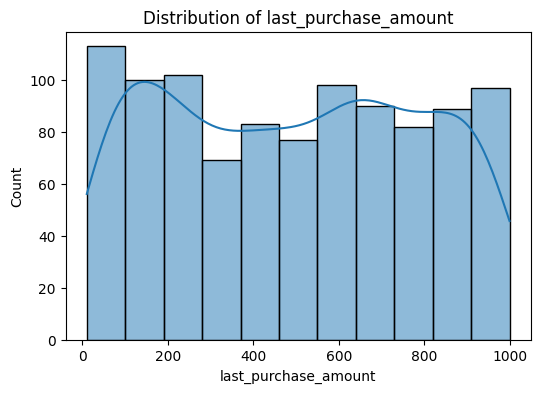

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['age', 'income', 'spending_score', 'membership_years', 
                'purchase_frequency', 'last_purchase_amount']

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


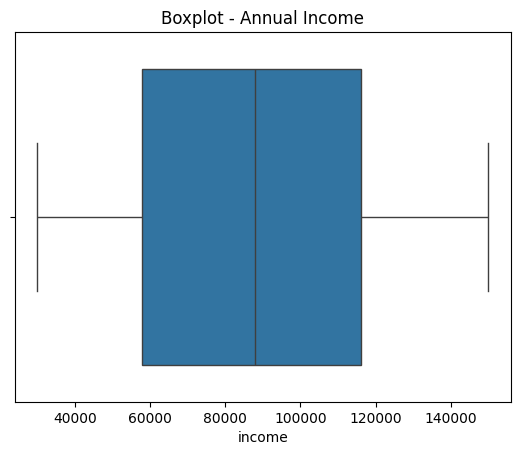

In [18]:
sns.boxplot(x=df['income'])
plt.title("Boxplot - Annual Income")
plt.show()


In [21]:
if 'preferred_category' in df.columns:
    plt.figure(figsize=(8,4)); sns.countplot(y='preferred_category', data=df); plt.show()


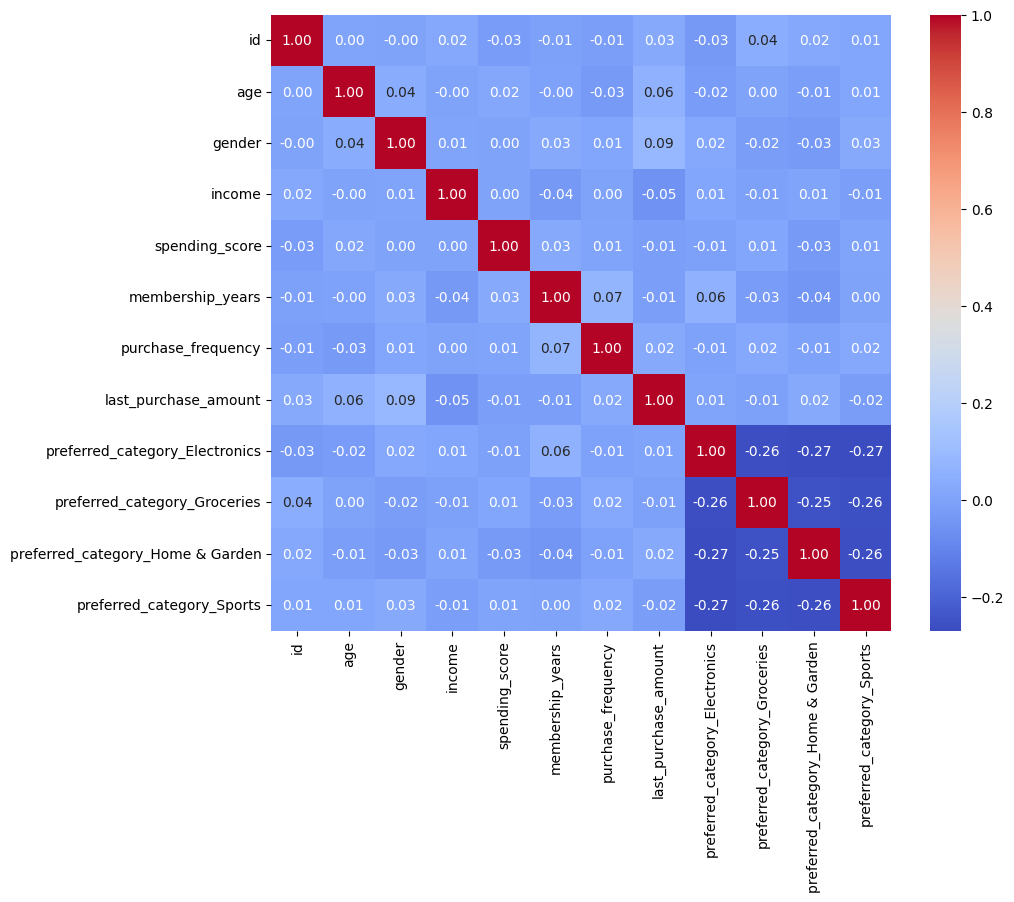

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


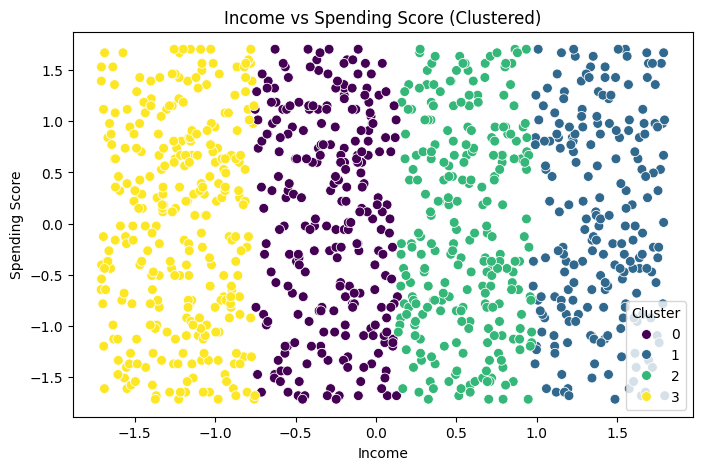

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Income vs Spending Score colored by Cluster
plt.figure(figsize=(8,5))
sns.scatterplot(
    x=df_model['income'],
    y=df_model['spending_score'],
    hue=df_model['cluster'],
    palette='viridis',
    s=50
)

plt.title("Income vs Spending Score (Clustered)")
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.legend(title='Cluster')
plt.show()


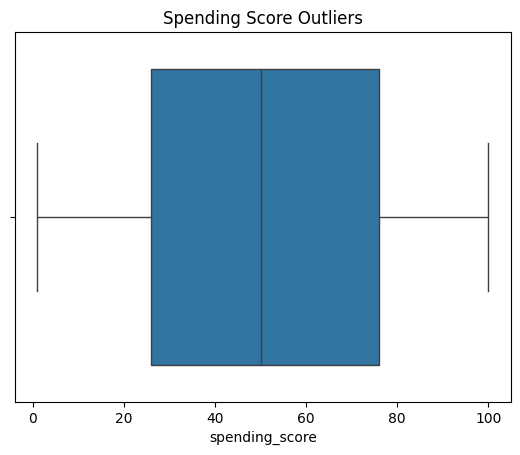

In [23]:
# Boxplot of Spending Score
sns.boxplot(x=df['spending_score'])
plt.title("Spending Score Outliers")
plt.show()


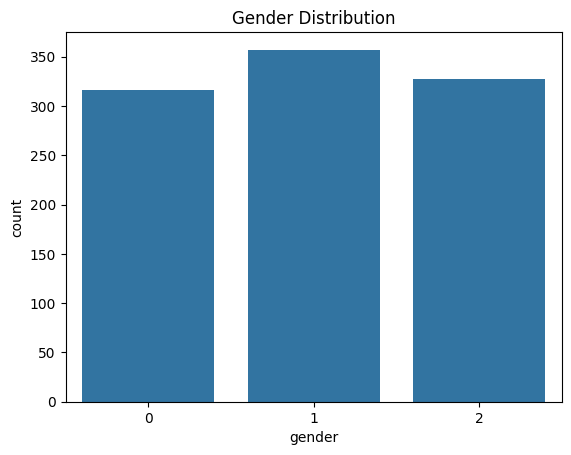

In [24]:
# Countplot of Gender
sns.countplot(x=df['gender'])
plt.title("Gender Distribution")
plt.show()


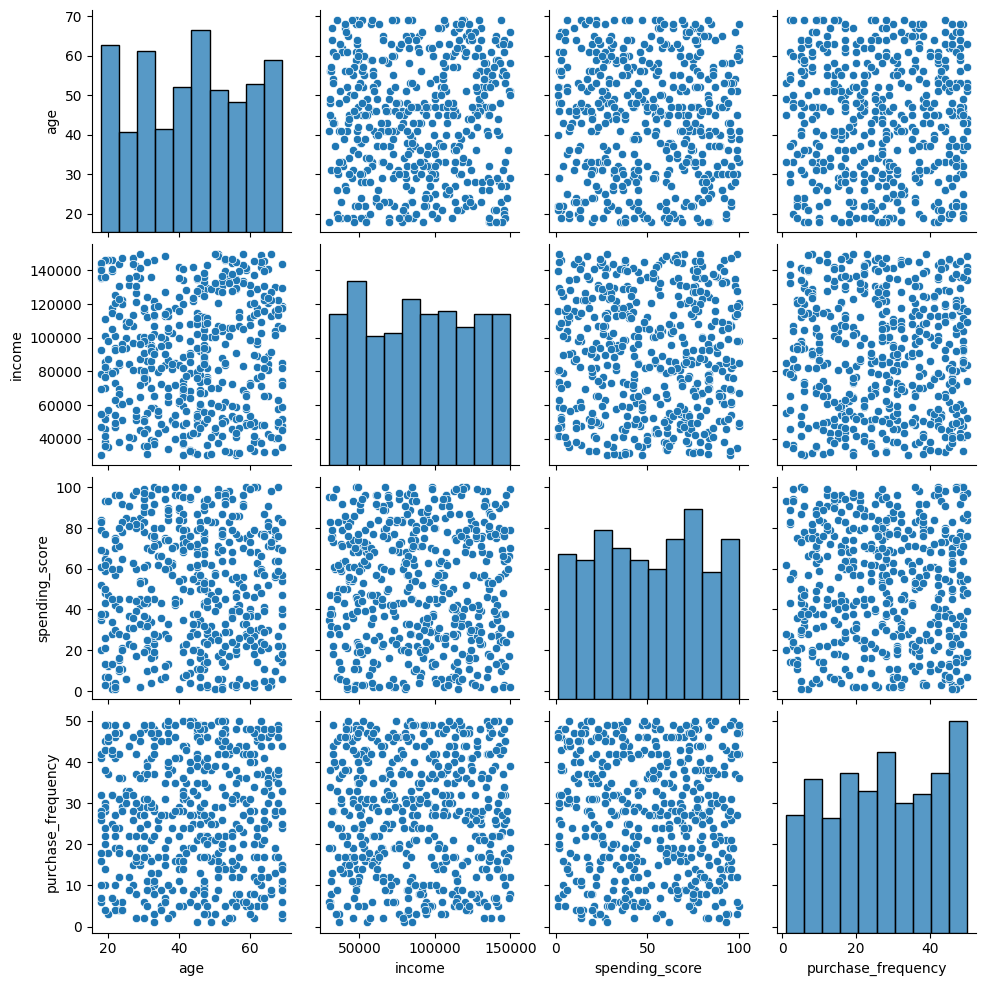

In [26]:
sns.pairplot(df[['age','income','spending_score','purchase_frequency']].sample(500))
plt.show()


In [58]:
#Identify Columns

In [25]:
df.columns = df.columns.str.strip()


In [61]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


In [62]:
print(df.columns)


Index(['id', 'age', 'gender', 'income', 'spending_score', 'membership_years',
       'purchase_frequency', 'last_purchase_amount',
       'preferred_category_electronics', 'preferred_category_groceries',
       'preferred_category_home_&_garden', 'preferred_category_sports',
       'cluster'],
      dtype='object')


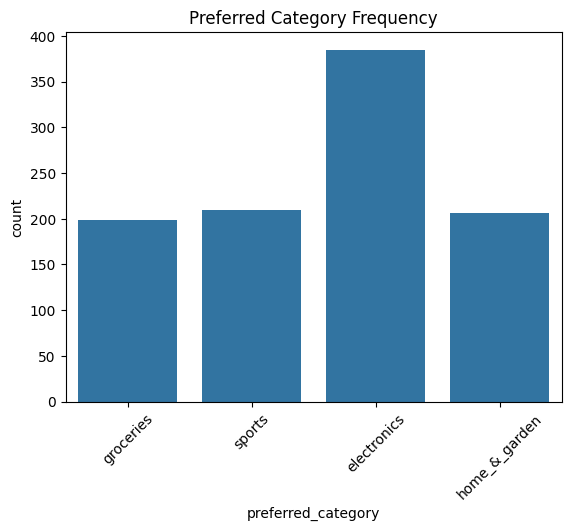

In [64]:
# 1. find all dummy columns for preferred_category
cat_cols = [c for c in df.columns if c.startswith('preferred_category_')]

# 2. reconstruct original category name
df['preferred_category'] = (
    df[cat_cols]
    .idxmax(axis=1)                         # column name with 1
    .str.replace('preferred_category_', '') # remove prefix
)

# 3. now the countplot will work
sns.countplot(x=df['preferred_category'])
plt.title("Preferred Category Frequency")
plt.xticks(rotation=45)
plt.show()


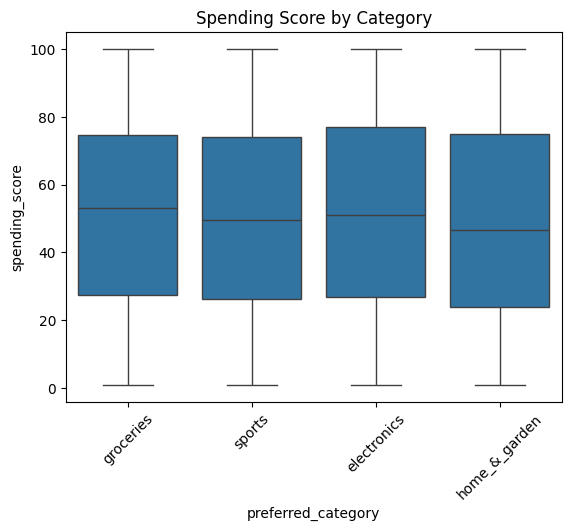

In [65]:
# Spending Score vs Category
sns.boxplot(x='preferred_category', y='spending_score', data=df)
plt.xticks(rotation=45)
plt.title("Spending Score by Category")
plt.show()


In [54]:
#Normalize/Scale Data

In [27]:
feature_cols = ['age','income','spending_score','membership_years','purchase_frequency','last_purchase_amount']
# plus any encoded preferred_category_x columns
feature_cols += [c for c in df.columns if c.startswith('preferred_category_')]
X = df[feature_cols].copy()


In [29]:
from sklearn.preprocessing import StandardScaler

# Make model dataset copy
df_model = df.copy()

# Select numerical features
numeric_cols = ['age', 'income', 'spending_score', 'membership_years',
                'purchase_frequency', 'last_purchase_amount']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df_model[numeric_cols])

# Convert back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols)

# Replace original numeric columns with scaled values
df_model[numeric_cols] = scaled_df

df_model.head()


,id,age,gender,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,preferred_category_Electronics,preferred_category_Groceries,preferred_category_Home & Garden,preferred_category_Sports
0,1,-0.384644,0,0.316868,1.358468,-0.865010,-0.182348,-1.281540,False,True,False,False
1,2,-1.515362,0,-0.282016,0.321865,-1.215358,1.082005,-1.523763,False,False,False,True
2,3,1.078639,0,1.112778,-0.714738,-1.215358,0.098620,-0.230005,False,False,False,False
3,4,-0.251618,2,-1.210096,0.805613,1.237080,-1.516943,1.690080,False,False,True,False
4,5,1.411203,0,1.523374,-1.025718,-0.865010,-0.112106,-0.491443,True,False,False,False


In [30]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
scaled_data_minmax = minmax.fit_transform(df_model[numeric_cols])
scaled_df_minmax = pd.DataFrame(scaled_data_minmax, columns=numeric_cols)



In [31]:
scaled_df.describe().round(2)


,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.71,-1.71,-1.72,-1.57,-1.80,-1.63
25%,-0.92,-0.89,-0.85,-0.87,-0.81,-0.93
50%,0.08,-0.02,-0.02,-0.16,0.03,-0.00
75%,0.88,0.81,0.87,0.89,0.87,0.86
max,1.68,1.80,1.70,1.59,1.64,1.72


In [56]:
#Apply K-Means Clustering

In [32]:
from sklearn.cluster import KMeans

# Choose number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit and predict clusters
clusters = kmeans.fit_predict(X)

# Add cluster labels to dataframe
df_model['cluster'] = clusters


In [57]:
#Determine optimal clusters

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Lists to store evaluation values
inertia = []
sil_scores = []

# Try cluster values from 2 to 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    
    # Store inertia and silhouette score
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X, labels))


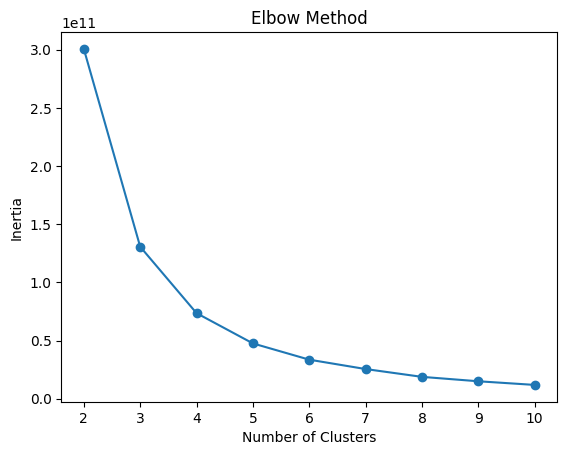

In [36]:
plt.plot(range(2, 11), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


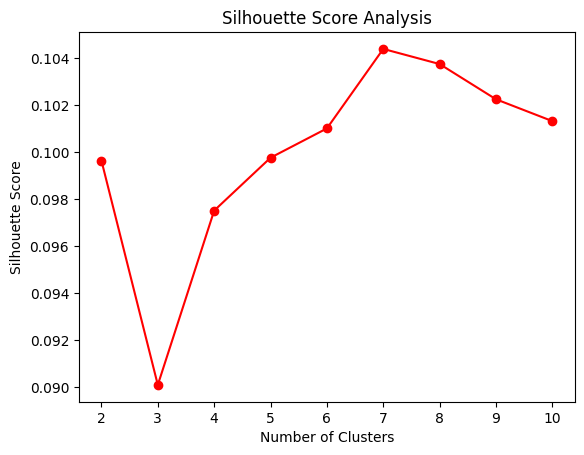

In [77]:
plt.plot(range(2, 11), sil_scores, marker='o', color='red')
plt.title("Silhouette Score Analysis")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()


In [79]:
# Compute mean values for each cluster
cluster_profile = df_model.groupby('cluster')[feature_cols].mean()

print(cluster_profile)


              age    gender    income  spending_score  membership_years  \
cluster                                                                   
0        0.528833  1.228137 -0.921561       -0.288272          0.042166   
1        0.850018  0.979757  0.967397        0.144202         -0.111832   
2       -0.530351  0.817121 -0.367062        0.901072          0.068798   
3       -0.913036  1.012876  0.419564       -0.821364         -0.004927   

         purchase_frequency  last_purchase_amount  \
cluster                                             
0                 -0.061895              0.662243   
1                 -0.084521             -0.019838   
2                 -0.012346             -0.531390   
3                  0.173082             -0.140354   

         preferred_category_electronics  preferred_category_groceries  \
cluster                                                                 
0                              0.212928                      0.193916   
1          

In [80]:
print(df_model['cluster'].value_counts())


cluster
0    263
2    257
1    247
3    233
Name: count, dtype: int64


In [51]:
#Visualize Charts 
#PCA

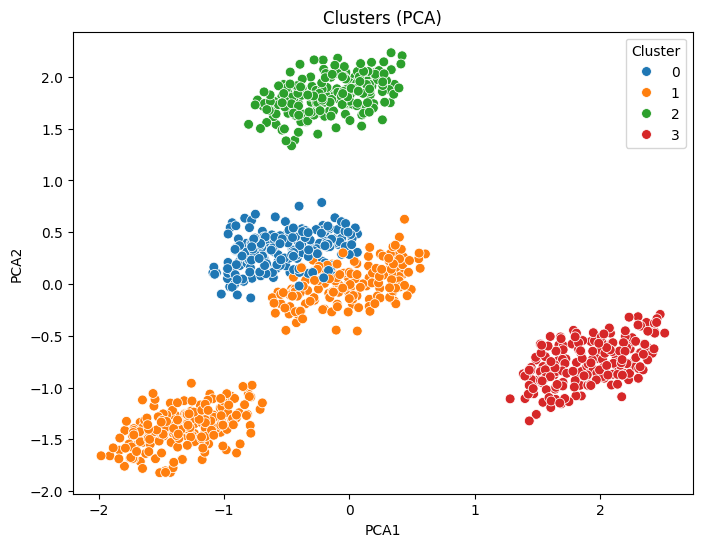

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=pc[:,0], y=pc[:,1], hue=df['cluster'], palette='tab10', s=50)
plt.xlabel('PCA1'); plt.ylabel('PCA2'); plt.title('Clusters (PCA)')
plt.legend(title='Cluster')
plt.show()


In [52]:
#Profile Each Clusters

In [42]:
cluster_profile = df.groupby('cluster')[feature_cols].mean().T
cluster_sizes = df['cluster'].value_counts().sort_index()
display(cluster_profile)
print(cluster_sizes)


cluster,0,1,2,3
age,43.793970,44.000000,44.104762,43.079070
income,87691.371859,89103.744681,87563.195238,89111.339535
spending_score,51.256281,50.420213,51.014286,50.297674
membership_years,5.321608,5.348404,5.480952,5.804651
purchase_frequency,27.160804,26.103723,27.114286,26.427907
last_purchase_amount,487.279397,498.388191,481.953190,496.632279
preferred_category_Electronics,0.000000,0.000000,0.000000,1.000000
preferred_category_Groceries,1.000000,0.000000,0.000000,0.000000
preferred_category_Home & Garden,0.000000,0.547872,0.000000,0.000000
preferred_category_Sports,0.000000,0.000000,1.000000,0.000000


cluster
0    199
1    376
2    210
3    215
Name: count, dtype: int64


In [43]:
# example: preferred category distribution per cluster
for col in [c for c in df.columns if 'preferred_category' in c]:
    print(col)
    display(pd.crosstab(df['cluster'], df[col], normalize='index'))


preferred_category_Electronics


preferred_category_Electronics,False,True
cluster,,
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0


preferred_category_Groceries


preferred_category_Groceries,False,True
cluster,,
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0


preferred_category_Home & Garden


preferred_category_Home & Garden,False,True
cluster,,
0,1.000000,0.000000
1,0.452128,0.547872
2,1.000000,0.000000
3,1.000000,0.000000


preferred_category_Sports


preferred_category_Sports,False,True
cluster,,
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0


In [53]:
#Cluster Distribution

C:\Users\DELL\AppData\Local\Temp\ipykernel_28236\3594050327.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_model['cluster'], palette='viridis')


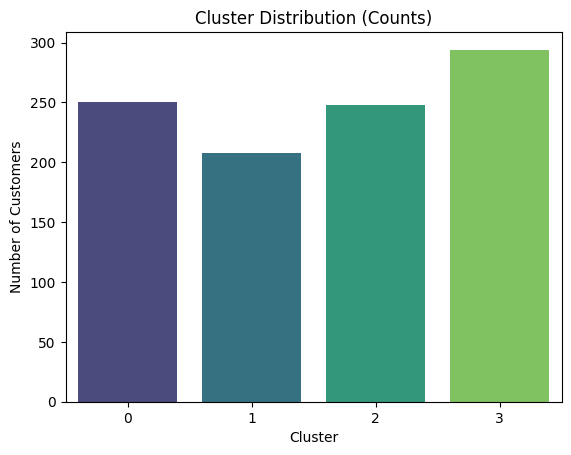

In [49]:
sns.countplot(x=df_model['cluster'], palette='viridis')
plt.title("Cluster Distribution (Counts)")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.show()
